In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

In [2]:
# define some helper functions
# gaussian pdf (1D)
def gaussian_pdf(x, mu, sigmasq):
    """
    Compute the pointwise log probability of data x from a 1D gaussian with
    mean mu and variance sigmasq.
    """
    return np.exp(-0.5*np.log(2.0*np.pi*sigmasq) -0.5 * (x - mu)**2 / sigmasq)

# posterior parameters of 1D Gaussian
def posterior_params(x, sigmasqx, mu0, sigmasq0):
    """
    Data x, size N (or N by 1)
    sigmasqx is conditional variance
    mu0 is prior mean
    sigmasq0 is prior variance
    """

    # compute sufficient statistics
    mu_hat = np.mean(x)
    N = x.shape[0]

    # compute prior and posterior weighting
    w_prior = sigmasqx / (N*sigmasq0 + sigmasqx)
    w_like  = N * sigmasq0 / (N*sigmasq0 + sigmasqx)
    mu_post = w_prior * mu0 + w_like * mu_hat
    sigma_post = 1.0 / (1.0 / sigmasq0 + N / sigmasqx)
    
    # return the posterior mean and posterior variance
    return mu_post, sigma_post

# likelihood function
def likelihood(mu, x, sigmasqx):
    """
    likelihood is a function of mean parameter mu
    conditioned on data x
    and variance parameter sigmasqx.
    
    This function evaluates the likelihood of the data for each mean provided in mu.
    """
    N = x.shape[0]
    sum_x = np.sum(x)
    sum_xx = np.sum(x**2)
    log_like = -0.5*N*np.log(2.0*np.pi*sigmasqx) -0.5/sigmasqx*(sum_xx - 2.0*sum_x*mu + mu**2)
    return np.exp(log_like)

## Bayesian inference for the mean of a Gaussian distribution

In this exercise, we will generate data from a 1-dimensional Gaussian distribution. We will then use Bayesian inference to infer the mean of this distribution, by setting a prior and computing the posterior. The coding is relatively minor - you are encouraged to examine how your results change if you:
1. Change your prior parameters (broad vs. narrow prior, centered at zero or away from zero)
2. Change the amount of data you generate (N = 1, 10, 1000)
3. Change the mean of the data distribution (near zero or away from zero)
4. Change the variance of the data distribution (small or large)

#### 1. Set the conditional mean and variance of the data distribution

We will generate data from the distribution:
$$ p(x|\mu_x, \sigma_x^2) = \mathcal{N}(\mu_x, \sigma_x^2). $$

In [3]:
# set conditional mean and variance
mux = -2.0
sigmasqx = 1.0

#### 2. Generate data

Use functions from numpy to generate $N$ data points from a Gaussian with mean $\mu_x$ and variance $\sigma_x^2$

In [4]:
N = 10 # how many data points
x = mux + np.sqrt(sigmasqx)*npr.randn(N) # generate data

#### 3. Set the parameters of the prior distribution over the mean

The prior is
$$ p(\mu | \mu_0, \sigma_0^2) = \mathcal{N}(\mu_0, \sigma_0^2). $$

In [5]:
# set prior mean and variance
mu0 = 0.0
sigmasq0 = 1.0

#### 4. Compute the posterior over the parameters

We can use the function `posterior_params` to compute the parameters of the posterior over $\mu:
$$p(\mu | x, \mu_0, \sigma_0^2).$$

In [6]:
# do Bayesian inference! 
# this function computes the parameters of the posterior
mu_post, sigma_post = posterior_params(x, sigmasqx, mu0, sigmasq0)

<IPython.core.display.Javascript object>


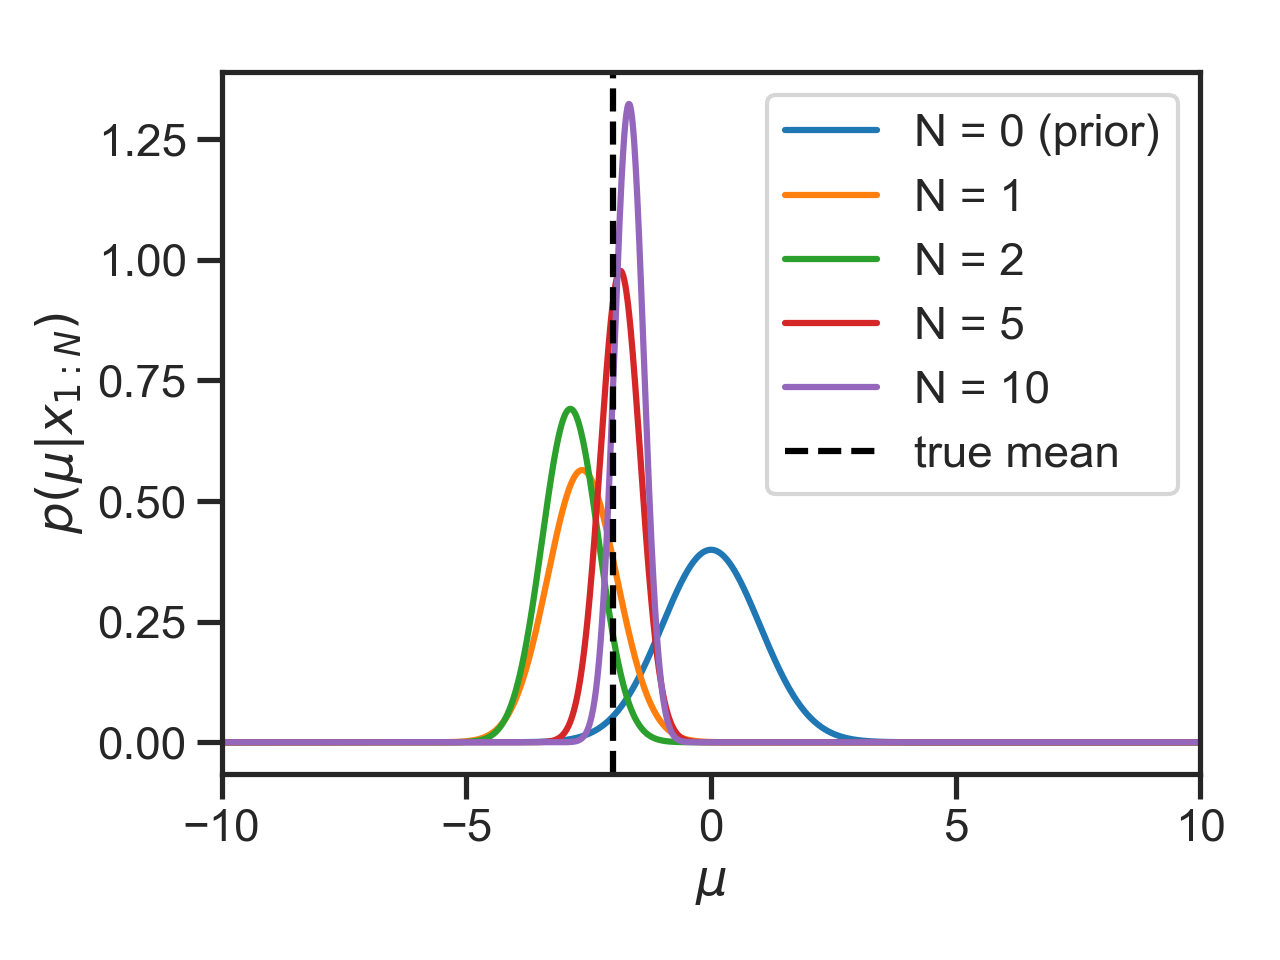

In [7]:
# plot the prior and posterior for different amounts of data

xlim = (-10, 10)
mu_range = np.arange(xlim[0],xlim[1],0.01)

N_plots = [1,2,5,10] # YOU CAN CHANGE THIS
plt.figure()
plt.plot(mu_range, gaussian_pdf(mu_range, mu0, sigmasq0), label="N = 0 (prior)")
for n in N_plots:
    mu_post, sigma_post = posterior_params(x[:n], sigmasqx, mu0, sigmasq0)
    plt.plot(mu_range, gaussian_pdf(mu_range, mu_post, sigma_post), label=("N = " + str(n)))
plt.xlim(xlim)
plt.axvline(mux, label="true mean",color='k', linestyle='--')
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu|x_{1:N})$")
plt.legend()
plt.tight_layout()